In [1]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from simple_fem import QuadElement, FEM


In [2]:
# Define a quadrilateral element
quad = QuadElement()

# Define the domain
x1 = torch.linspace(-1, 1, steps=100)
x2 = torch.linspace(-1, 1, steps=100)
x = torch.stack(torch.meshgrid(x1, x2, indexing="xy"), dim=2)

# Plot the shape functions
fig = make_subplots(
    rows=2,
    cols=2,
    horizontal_spacing=0.0,
    vertical_spacing=0.0,
    specs=[
        [{"type": "surface"}, {"type": "surface"}],
        [{"type": "surface"}, {"type": "surface"}],
    ],
)
fig.add_trace(go.Surface(z=quad.N(x)[..., 0], x=x1, y=x2), row=1, col=1)
fig.add_trace(go.Surface(z=quad.N(x)[..., 1], x=x1, y=x2), row=1, col=2)
fig.add_trace(go.Surface(z=quad.N(x)[..., 2], x=x1, y=x2), row=2, col=1)
fig.add_trace(go.Surface(z=quad.N(x)[..., 3], x=x1, y=x2), row=2, col=2)
fig.update_traces(showscale=False)
fig.update_layout(autosize=False, width=800, height=800)
fig.update_scenes(
    xaxis_title_text="ξ1", yaxis_title_text="ξ2", zaxis_title_text="N(ξ,η)"
)
fig.show()


## Define a regular FEM problem

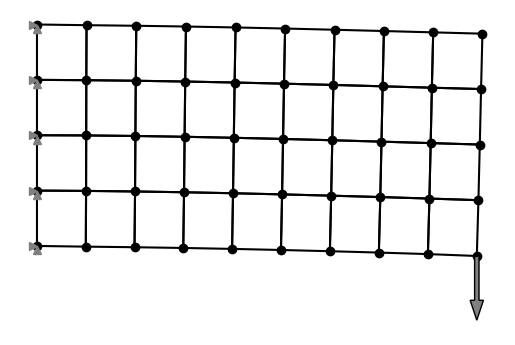

In [3]:
size = 1.0
Lx = 10.0
Nx = int(Lx / size)
Ly = 5.0
Ny = int(Ly / size)

# Create nodes
n1 = torch.linspace(0.0, Lx, Nx)
n2 = torch.linspace(0.0, Ly, Ny)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

# Create elements
elem = []
for j in range(Ny - 1):
    for i in range(Nx - 1):
        n0 = i + j * Nx
        elem.append([n0, n0 + 1, n0 + Nx + 1, n0 + Nx])
elements = torch.tensor(elem)

# Boundary conditions
forces = torch.zeros_like(nodes)
forces[9, 1] = -1.0
constraints = torch.zeros_like(nodes, dtype=bool)
for i in range(Ny):
    constraints[i * Nx, :] = True

# Material properties
E = 100.0
nu = 0.48

rectangle = FEM(nodes, elements, forces, constraints, E, nu)
u = rectangle.solve()
rectangle.plot(u)
